# M/EEG analysis with MNE Python
<i>IMPRS - Using Python for Cognitive Science (2020)</i>

Good morning! Today we will be working through this tutorial to get familiar with MNE. We are going to do an analysis of MEG/EEG data provided by MNE. 

This experiment uses sample data from the MNE website. These data were acquired with the Neuromag Vectorview system. EEG data from a 60-channel electrode cap were acquired simultaneously with the MEG. 

In this experiment, checkerboard patterns were presented into the left and right visual field, interspersed by tones to the left or right ear. The interval between the stimuli was 750 ms. Occasionally a smiley face was presented at the center of the visual field. The participant was asked to press a key with the right index finger as soon as possible after the appearance of the smiley face.

Trigger codes:

    Name     ID	#Contents
    LA	    1	Response to left-ear auditory stimulus
    RA	    2	Response to right-ear auditory stimulus
    LV	    3	Response to left visual field stimulus
    RV	    4	Response to right visual field stimulus
    smiley	5	Response to the smiley face
    button	32   Response triggered by the button press
    
[Source](https://mne.tools/stable/generated/mne.datasets.sample.data_path.html#mne.datasets.sample.data_path)

The content of today is as follows:

0. Importing modules
1. Loading data (the <b>Raw</b> data structure)
2. Preprocessing & Artifact rejection
3. Events & Epochs (the <b>Epochs</b> data structure)
4. Evoked responses (the <b>Evoked</b> data structure)

## 0. Importing modules
We will need <b>os</b>, <b>NumPy</b>, <b>matplotlib</b>, and (of course) <b>MNE-Python</b> ("import mne").

Import them below.

In [174]:
import os 
import numpy as np
import matplotlib
import mne
import sklearn

## 1. Loading data: the <i>Raw</i> data structure

MNE-Python uses the FIF file format from Neuromag. The MPI EEG uses xxxx and the Donders MEG are xxxx - that is not a problem, because MNE provides data reader-functions for a wide variety of other data formats.

We are going to download the example dataset. Notice that we are downloading the data using ```mne.datasets.sample.data_path()```. This may take a while.

In [182]:
default_path = mne.datasets.sample.data_path()
raw_fname = os.path.join(default_path, 'MEG', 'sample', 'sample_audvis_raw.fif')

To access the data, we use ```read_raw_fif``` function. This creates an instance of MNE's Raw class (= an object!). The Raw object has an attribute <i>info</i>: this attribute contains information about the dataset.

Here, we will load the data into memory ```preload``` flag inside the reader function. If we don't do that, the data will be retrieved on the go instead of loading it to memory. This is useful if you're working with multiple participants' data: the memory of your computer is not unlimited.

Good to know is that you can still access the info attribute if you don't preload the data.

In [183]:
raw = mne.io.read_raw_fif(raw_fname, preload=True)
#print(raw)
raw_temp = raw.copy()
print('Number of channels in raw_temp:')
print(len(raw_temp.ch_names), end=' → drop two → ')
raw_temp.drop_channels(['EEG 037', 'EEG 059'])
print(len(raw_temp.ch_names), end=' → pick three → ')
raw_temp.pick_channels(['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123'])
print(raw_temp)

Opening raw data file C:\Users\Gebruiker\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


MemoryError: Unable to allocate 478. MiB for an array with shape (376, 166800) and data type float64

Print the raw object below to see what information it gives you. Then print the info attribute. What new information do you see? What is the sampling frequency of the data, how many bad channels are there?

In [184]:
print(raw_temp.info)

<Info | 20 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123
 chs: 4 GRAD, 1 MAG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 5
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>


To access a particular element of this dictionary, you can use square brackets as you would with a normal Python dictionary. Try printing the sampling rate, bad channels, and channel names below.

In [185]:
# Complete the code by replacing the underscores _______
print('Sampling rate: ', int(raw_temp.info['sfreq']), 'Hz')
print('Bad channels: ', raw_temp.info['bads'])

# For channel names, it is not mandatory to access through info
# Try printing the channels as an attribute of the raw object
print('Channel names: ', raw_temp.info['ch_names'])

Sampling rate:  600 Hz
Bad channels:  []
Channel names:  ['MEG 0113', 'MEG 0112', 'MEG 0111', 'MEG 0122', 'MEG 0123']


The experiment data can be accessed through ```raw._data.``` What shape do you think it should have? How many columns and rows? 

Try to figure it out using a NumPy function.

In [186]:
num_rows, num_cols = raw_temp._data.shape
print (num_rows, num_cols)

AttributeError: 'Raw' object has no attribute '_data'

The Raw object also has a couple of built-in plotting methods, such as the power spectral density using ```plot_psd``` and the raw sensor traces using ```plot``` (some parameters: duration (seconds) and n_channels). 

Effective window size : 3.410 (s)
Effective window size : 3.410 (s)
Need more than one channel to make topography for mag. Disabling interactivity.


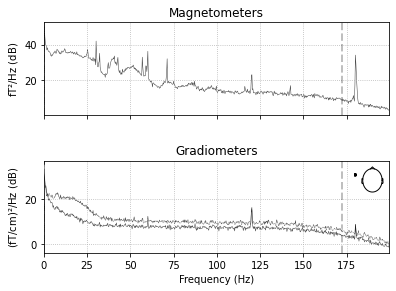

In [170]:
# power spectral density
psd_plot = raw_temp.plot_psd(fmax=200)

Try to plot 2 seconds of data for 30 channels below.

Effective window size : 3.410 (s)
Effective window size : 3.410 (s)
Need more than one channel to make topography for mag. Disabling interactivity.


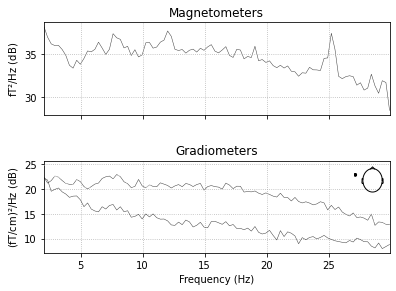

In [162]:
psd_plot = raw_temp.plot_psd(2, 30)

The raw object also has some other useful methods to manipulate the data. Some of them are:

* ```raw.copy()``` - Get a deep copy of the raw data to avoid modifying the original files
* ```raw.crop([tmin, tmax])``` - Crop the data based on time
* ```raw.get_data([picks, start, stop,...])``` - Get specific parts of the data, without metadata
* ```raw.filter(l_freq, h_freq[,picks,...])``` - Apply band-pass filters
* ```raw.resample(sfreq[,npad, window, stim_picks, ...])``` - Change the sampling rate of the data
* ```raw.save(fname[,picks, tmin, tmax,...])``` - Save data (possibly after preprocessing)
* ```raw.set_eeg_reference()``` - Specify the reference for EEG data
* ```raw.to_data_frame()``` - Export data as a DataFrame to use with MATLAB/R/Pandas

## 2. Preprocessing

### 2.1 Filtering data
After examining your data, the first thing you do is filter them based on what kind of analysis you want to do. For an ERP and time-frequency analysis, you would normally want to get rid of very high (e.g., above 100Hz) and very low (e.g., below 0.1 Hz) frequencies. It is important to also remove power line noise (e.g., 50Hz or 60Hz and their harmonics).

The values for your low and high pass filters depend on your effect of interest, but cannot exceed the nyquist frequency defined by your sampling rate. That is, it cannot be higher than your sampling rate divided by 2.

What is our sampling rate? What is the maximum frequency to include in our data?

To filter data with MNE, you first need to select which data are going to be filtered, and subsequently apply the respective filters only on that part of the data (i.e., we don't want to filter the stimulus channel). To accomplish this, we use the MNE function ```pick_types()```. 

The function has the following signature:

```mne.pick_types(raw.info, meg=True, eeg=False, stim=False, eog=False, ecg=False, emg=False, ref_meg='auto', misc=False, resp=False, chpi=False, exci=False, ias=False, syst=False, seeg=False, dipole=False, gof=False, bio=False, ecog=False, fnirs=False, include=(), exclude='bads', selection=None)```

In the code cell below, try to use mne.pick_types() to select the MEG channels. Assign them to a variable "picks", and print the result. Note: you don't have to specify all of them. 'False' is the default for most channel types, so they will be excluded if you don't specify them.

In [171]:
picks = mne.pick_types(raw_temp.info, meg=True, eeg=False, stim=False, eog=False, ecg=False, emg=False, ref_meg='auto', misc=False, resp=False, chpi=False, exci=False, ias=False, syst=False, seeg=False, dipole=False, gof=False, bio=False, ecog=False, fnirs=False, include=(), exclude='bads', selection=None)

print(picks)

[0 1 2 3 4]


There are three ways of applying filters to the data. You can either use a method from MNE on the data using `mne.filter.filter_data(data, sfreq, picks, l_freq, h_freq)` or directly apply the filter to the raw data using `raw.filter(picks, l_freq, h_freq)` for low/high pass filters, and `raw.notch_filter(freqs, picks)` to remove power line noise.


---


1. ```mne.filter.filter_data(data, sfreq, l_freq, h_freq, picks=None, filter_length='auto', l_trans_bandwidth='auto', h_trans_bandwidth='auto', n_jobs=1, method='fir', iir_params=None, copy=True, phase='zero', fir_window='hamming', fir_design='firwin', pad='reflect_limited', verbose=None)```




2. ```raw.filter(l_freq, h_freq, picks=None, filter_length='auto', l_trans_bandwidth='auto', h_trans_bandwidth='auto', n_jobs=1, method='fir', iir_params=None, phase='zero', fir_window='hamming', fir_design='firwin', skip_by_annotation=('edge', 'bad_acq_skip'), pad='reflect_limited', verbose=None)```




3. ```raw.notch_filter(freqs, picks=None, filter_length='auto', notch_widths=None, trans_bandwidth=1.0, n_jobs=1, method='fir', iir_params=None, mt_bandwidth=None, p_value=0.05, phase='zero', fir_window='hamming', fir_design='firwin', pad='reflect_limited', verbose=None)```


---


The difference is that mne.filter.filter_data() will apply the filters and return a copy, while the other two methods will apply the filters in-place (directly on the data).

By default, MNE applies a FIR filter with Hanning window, but this can be modified to design specific filters. A detailed discussion of filter design is beyond the scope of this tutorial. For more in-depth information on filtering, you can visit [this website](https://mne.tools/stable/generated/mne.filter.create_filter.html#mne.filter.create_filter).

Apply a bandpass filter from 1 to 100 Hz and a notch filter at 60Hz and its first harmonic (120Hz) on our selected channels ("picks"). Note: the frequencies in ```raw.notch_filter``` are specified by a list of integers (in our case ```[60, 120]```).

Then use the ```plot_psd()``` method to visualise what you've done.

In [172]:
raw_temp_filter = raw_temp.filter(60, 120, picks=None, filter_length='auto', l_trans_bandwidth='auto', h_trans_bandwidth='auto', n_jobs=1, method='fir', iir_params=None, phase='zero', fir_window='hamming', fir_design='firwin', skip_by_annotation=('edge', 'bad_acq_skip'), pad='reflect_limited', verbose=None)
plot_psd = raw_temp_filter.plot_psd()
notch_filter = raw_temp.notch_filter([60, 120], picks)
plot_psd = notch_filter.plot_psd()


RuntimeError: By default, MNE does not load data into main memory to conserve resources. inst.filter requires raw data to be loaded. Use preload=True (or string) in the constructor or raw.load_data().

If you want to try different values for the filters, you have to reload the data: you have modified the data loaded in the variable ```raw```, but not the data saved on disk. If you want, you can try it in the block below. Make sure to use a different variable name (not "raw").

In [58]:
# raw_practice2 = mne.io.read_raw_fif(raw_fname, preload=True)
# psd_plot = raw_practice2.plot_psd(fmax=200)
# psd_plot = raw_practice2.plot_psd(2, 30)
# picks = mne.pick_types(raw_practice2.info, meg=True, eeg=False, stim=False, eog=False, ecg=False, emg=False, ref_meg='auto', misc=False, resp=False, chpi=False, exci=False, ias=False, syst=False, seeg=False, dipole=False, gof=False, bio=False, ecog=False, fnirs=False, include=(), exclude='bads', selection=None)
# raw_practice2_filter = raw.filter(40, 100, picks=None, filter_length='auto', l_trans_bandwidth='auto', h_trans_bandwidth='auto', n_jobs=1, method='fir', iir_params=None, phase='zero', fir_window='hamming', fir_design='firwin', skip_by_annotation=('edge', 'bad_acq_skip'), pad='reflect_limited', verbose=None)
# plot_psd = raw_practice2_filter.plot_psd()
# notch_filter = raw_practice2.notch_filter([40, 100], picks)
# plot_psd = notch_filter.plot_psd()

#none of this worked because it was a memory overload. 

notch_filter.save('AJT_MEG_Data.fif')

Writing C:\Users\Gebruiker\OneDrive\CLS PhD\MPI\Python_workshop\Session_7MNE\session7\AJT_MEG_Data.fif


<ipython-input-58-4233674ef098>:12: RuntimeWarning: This filename (C:\Users\Gebruiker\OneDrive\CLS PhD\MPI\Python_workshop\Session_7MNE\session7\AJT_MEG_Data.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  notch_filter.save('AJT_MEG_Data.fif')


Closing C:\Users\Gebruiker\OneDrive\CLS PhD\MPI\Python_workshop\Session_7MNE\session7\AJT_MEG_Data.fif
[done]


If you wanted to save your data at this point, you could do this by using:
    ```[your_varname].save('[YOUR_FILENAME].fif')```

### 2.2. Artifact removal
MNE-Python supports a lot of processing approaches and techniques for artifact correction. Here we'll use Independent Component Analysis (ICA). ICA separates the data into a given number of underlying components. ICA can capture systematic variability caused by physiological processes, such as blinking, breathing, and the heartbeat, in a small number of components. These components have to be identified and removed to clean the data.

In [73]:
from mne.preprocessing import ICA

There are different methods for ICA. We will use MNE's default: FastICA. 

To performICA, you have to create an instance of the ICA class, fit it to the data, and then plot the components. To create an ICA instance, use:

```ICA(n_components=None, max_pca_components=None, n_pca_components=None, noise_cov=None, random_state=None, method='fastica', fit_params=None, max_iter=200, verbose=None)```

Where ```n_components``` can be a number of components or a percentage of the data explained, e.g. ```25``` for 25 components, or ```0.95``` for 95% of the data explained.

In [74]:
method = 'fastica'
n_components = 25
random_state = 23  # this number guarantees that anyone running the script will get the same results

ica = ICA(n_components=n_components, method=method, random_state=random_state)
print(ica)

<ICA | no decomposition, fit (fastica):  samples, no dimension reduction>


OK, now we have an instance of the ICA class that we can apply to the data. First, for faster processing, resample the data to 200Hz below using ```raw.resample(sfreq)```.
Then apply the ICA to the data using ```ica.fit(data, picks)```.

In [93]:
raw.resample(200)

320 events found
Event IDs: [ 1  2  3  4  5 32]


MemoryError: Unable to allocate 159. MiB for an array with shape (376, 55543) and data type float64

In [89]:
ica.fit(raw, picks)

Fitting ICA to data using 305 channels (please be patient, this may take a while)


MemoryError: Unable to allocate 388. MiB for an array with shape (305, 166800) and data type float64

You can visualize the topographic maps of the components by using the ```ica.plot_components()``` method.
To plot properties of several components at once and examine them to decide if they are artifacts, you can use ```ica.plot_properties(data, picks)```. Try both below.

In [88]:
ica.plot_components()

AttributeError: 'ICA' object has no attribute 'mixing_matrix_'

MemoryError: Unable to allocate 475. MiB for an array with shape (138, 376, 1201) and data type float64

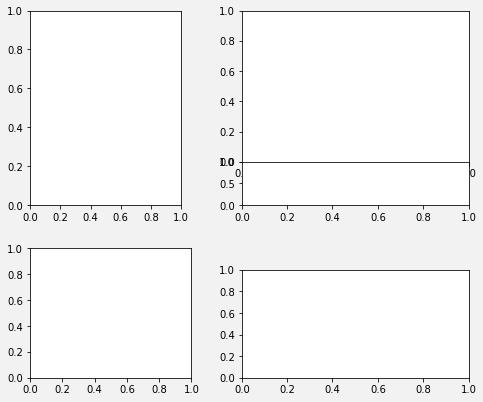

In [180]:
ica.plot_properties(raw, picks)

Which ones do you think are artifacts, such as blinks, eye movements, or heartbeats?

In this example we are going to remove component 0 to 3 as they represent movement, heartbeat, saccades, and blink artifacts, respectively.

To remove artifacts, we use the method ```ica.apply(data, exclude)```. The components are represented by their index in a list, so the second argument must be ```[0, 1, 2, 3]```. In the same way, you can plot how the data would look without the excluded components before removing them by using ```ica.plot_overlay(data, exclude)```. Do that first, and then remove the artifacts.

In [181]:
ica.apply(raw, [1,2,3])

RuntimeError: By default, MNE does not load data into main memory to conserve resources. ica.apply requires raw data to be loaded. Use preload=True (or string) in the constructor or raw.load_data().

In [ ]:
# Your code here

# 3. Experimental events

### 3.1 Detecting events

OK, our data are clean. In order to make averages over trials and further analyze the data, we need to segment the data. To do so, we need to know the onset (and possibly, the offset) of each event as identified by triggers that were sent during the experiment.

The function to get events from the data is as follows:

```mne.find_events(raw, stim_channel=None, output='onset', consecutive='increasing', min_duration=0, shortest_event=2, mask=None, uint_cast=False, mask_type='and', initial_event=False, verbose=None)```

Our stimulus channel (```stim_channel```) is <b>STI 014</b>.

Create an 'events' variable, and print the first 5 events.

In [94]:
ica.plot_overlay(raw, [1,2,3])

As you can see, events have a time stamp (in samples), a code for consecutive events, and an event ID (1, 2, 3 or 4).

### 3.2 Epoching

To segment the data, we create an instance of the Epochs class. This means that, after epoching, the data is no longer in a Raw-object; it is now in an Epochs object, with its own methods and attributes.

```mne.Epochs(raw, events, event_id=None, tmin=-0.2, tmax=0.5, baseline=(None, 0), picks=None, preload=False, reject=None, flat=None, proj=True, decim=1, reject_tmin=None, reject_tmax=None, detrend=None, on_missing='error', reject_by_annotation=True, metadata=None, verbose=None)```

The parameters for segmenting are the following:

* ```tmin``` - Time before trigger
* ```tmax``` - Time after trigger
* ```preload``` - Used to load the data in memory
* ```baseline``` - Baseline corrects each epoch. Normally indicated by using a tuple (None, 0), where None is automatically replaced by tmin

You can also label your events using ```event_id```.

In [187]:
# create a dictionary for the labels
event_ids = {'A/L': 1, 'A/R': 2, 'V/L': 3, 'V/R':4, 'S': 5, 'B': 32}

# A/L: left-ear auditory stimulus
# A/R: right-ear auditory stimulus
# V/L: left visual field stimulus
# V/R: right visual field stimulus
# S: smiley face
# B: button press

In [91]:
epochs = mne.Epochs(raw_ica, events, event_id=event_ids, tmin=-0.2, tmax=0.5, 
                    picks=picks, preload=True, baseline=(None, 0.0))

NameError: name 'raw_ica' is not defined

You can now plot the epochs and interactively select bad epochs to remove from further analysis using ```epochs.plot()```. This doesn't work in Jupyter notebook, so you can try this some other time using a script in Pycharm or VSCode.

After epoching is a good moment to save your data. You can do this in the following way:
    
    epochs.save('sample-epo.fif')

And then read them again:
    
    saved_epochs = mne.read_epochs('sample-epo.fif')

## 4. Evoked responses

To average the data by condition you can use the `epochs[condition].average(picks)` method. This will create an Evoked object that can be ploted to visualize the ERP/Fs. 

In [ ]:
evoked_VR = epochs['V/R'].average()
VR_plot = evoked_VR.plot(spatial_colors=True, time_unit='s')

We see that most effects occur between time point 0 and time point 0.3. Let's make a topographic plot between these time points.

In [ ]:
VR_topoplot = evoked_VR.plot_topomap(times=[0.05, 0.075, 0.1, 0.125, 0.150], time_unit='s')

Recall that a visual stimulus was presented to the right visual field. As expected, we see a dipole in the left occipital area.

There are many options for plotting the data.
For now, try to run a for-loop with all the conditions to visualize them separately.

You can check out other ways of doing this [here](https://mne.tools/stable/auto_examples/visualization/plot_topo_compare_conditions.html?highlight=plot%20evoked%20data).

In [ ]:
# Your code here